<a href="https://colab.research.google.com/github/roberto-paixao/analise-airbnb-toquio/blob/main/Analise_de_Dados_Airbnb_T%C3%B3quio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Airbnb-logo" width="450" src="https://raw.githubusercontent.com/roberto-paixao/Analise_Airbnb_Toquio/main/imgs/airbnb_logo.jpg">

---

# Análise dos Dados do Airbnb - Tóquio


O [Airbnb](https://www.airbnb.com.br/) é um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem, fundada em 2008, a empresa hoje possui um valor estimado de mais de 1 bilhão de dólares. A  plataforma já se tornou a solução ideal para quem prefere se hospedar em uma casa, apartamento e entre vários tipos de acomodações disponíveis em seu catálogo.

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados de algumas das principais cidades do mundo por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<img alt="Analisando Airbnb" width="10%" src="https://raw.githubusercontent.com/roberto-paixao/Analise_Airbnb_Toquio/main/imgs/airbnb-logo_pequeno.jpg">

**Neste *notebook*, iremos analisar os dados referentes à cidade de Tóquio e ver quais insights podem ser extraídos a partir de dados brutos.**
<br><br>

# **Tóquio, Japão**

<img alt="Tokyo-logo" width=60% src="https://raw.githubusercontent.com/roberto-paixao/analise-airbnb-toquio/main/imgs/tokyo-logo.jpg"><br>
<a href='https://br.freepik.com/vetores/projeto'>freepik - br.freepik.com</a>

<br>

A região metropolitana de Tóquio possui aproximadamente *37 milhões de habitantes*, o maior aglomerado urbano do mundo, é constituída por *23 bairros, 26 municípios adicionais e as ilhas Izu e Ogasawara*.

Tóquio possui diversos pontos turísticos, como os santuários *Meiji* e *Senso-ji*, templos budistas, parques, jardins (*Ueno e Yoyogi*).

Em 2019, o país registrou o seu oitavo crescimento no número de visitantes, chegando a *31,8 milhões*, esse número representa um aumento de 467% em um década, saindo de *7 milhões* para quase *32 milhões* de visitantes. E em 2021, foram realizadas os **Jogos Olimpícos de Verão** na cidade de Tóquio, o momento perfeito para uma análise exploratória dessa região.

---


## Obtenção dos Dados

Os dados foram coletados do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Nesta análise inicial, usaremos o arquivo:
* `listings.csv` - *Summary information and metrics for listings in Tokyo (good for visualisations).*

O arquivo `listing.csv` é uma versão resumida de um dataset maior, com mais atributos (*features*). Entretanto, para uma análise inicial, a versão resumida servirá ao nosso propósito.

O dicionário de dados a seguir, facilitará o entendimento sobre a informação de cada atributo:

**Dicionário das variáveis**

|Atributo|Descrição|
| --- |---|
| id | Número de id gerado para identificar o imóvel
| name | Nome da propriedade anunciada
| host_id | Número de id do proprietário (anfitrião) da propriedade
| host_name | Nome do anfitrião
| neighbourhood_group | Grupo no qual o bairro pertence
| neighbourhood | Nome do bairro
| latitude | Coordenada da latitude da propriedade
| longitude | Coordenada da longitude da propriedade
| room_type | Informa o tipo de quarto que é oferecido
| price | Preço para alugar o imóvel
| minimum_nights | Quantidade mínima de noites para reservar
| number_of_reviews | Número de reviews que a propriedade possui
| last_review | Data do último review
| reviews_per_month | Quantidade de reviews por mês
| calculated_host_listings_count | Quantidade de imóveis do mesmo anfitrião
| availability_365 | Número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a "cara" do nosso *dataset*, analisando as 5 primeiras e últimas entradas.


## Análise dos Dados

Usaremos as bibliotecas:
- `pandas` - Geração e manipulação de DataFrames.
- `numpy` - Manipulação de valores numéricos.
- `matplotlib` e `seaborn` - Visualização de Dados.
- `folium` - Criação de mapas interativos.

Primeiro, importaremos as bibliotecas que serão usadas para realizar a análise do dataset, bem como as bibliotecas que serão usadas para a visualização gráfica dos dados.

In [1]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize

# Configurações de gráficos
sns.set()
sns.set_style("white")

%matplotlib inline

Agora, usando o método `read_csv` do Pandas, poderemos gerar um dataframe para explorarmos.

In [2]:
# Importando o dataset e gerando um DataFrame

DATA_PATH = "https://raw.githubusercontent.com/roberto-paixao/analise-airbnb-toquio/main/data/listings.csv"
df = pd.read_csv(DATA_PATH)

Para checar se tudo ocorreu bem, o método `df.head()` e `df.tail()` nos mostrará, respectivamente, as 5 primeiras e as 5 últimas linhas do dataframe gerado.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,16000,3,165,2019-11-14,1.54,1,363
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7676,3,228,2020-01-18,2.39,1,144
2,1033276,private room @Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74437,139.79739,Private room,30000,1,72,2018-04-15,0.80,2,270
3,1096292,Home stay with a Japanese language teacher fam...,6018145,Mari,NaN,Shinjuku Ku,35.69233,139.70851,Private room,11312,1,252,2020-02-12,2.80,3,365
4,1196177,Stay with host Cozy private room Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74475,139.79731,Private room,3000,2,95,2020-03-17,1.01,2,88


In [4]:
# Mostra as 5 últimas entradas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10755,51051912,6min walk to Sta./12min to Shinjuku/Free WiFi,29966538,Ostay-Jennie,NaN,Nakano Ku,35.722192,139.666862,Entire home/apt,4720,1,0,NaN,NaN,21,365
10756,51052520,15mins to Shinjuku/Ikebukuro/Ginza/Tokyo!MAX 5ppl,230616333,Ostay-Ryu,NaN,Shinjuku Ku,35.693259,139.735440,Entire home/apt,4463,1,0,NaN,NaN,5,347
10757,51082002,NEW Open 池袋站徒步6分钟,296689302,Qingmei,NaN,Toshima Ku,35.733786,139.714920,Entire home/apt,6400,1,0,NaN,NaN,6,158
10758,51092629,山手线駒込站步行2分/全新公寓/独立卫浴/直达新宿上野,43826309,Momo,NaN,Kita Ku,35.736881,139.751850,Entire home/apt,3200,1,0,NaN,NaN,27,358
10759,51107109,新築マンション、スカイツリー周囲、駅に歩いて3分です、羽田空港バス直通、成田空港直通、,106084840,Izumi,NaN,Sumida Ku,35.695210,139.818514,Entire home/apt,3500,1,0,NaN,NaN,2,179


Analisar as primeiras e últimas linhas nos mostrará como os dados foram importados e ainda pode nos informar se há algum erro em relação ao formato/tipo de cada coluna. Com o dataframe gerado com sucesso podemos iniciar nossa **análise exploratória de dados** do dataset.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O primeiro passo a ser tomado ao iniciar uma análise exploratória de dados é checar a estrutura do dataset, verificar como o dataset está organizado, quantas linhas e colunas o dataset possui e quais são os tipos de atributos presentes nos datasets.



In [5]:
# Quantidade de linhas e colunas do dataset
observacoes = df.shape[0]
atributos = df.shape[1]

print("Observações:\t",observacoes)
print("Atributos:\t", atributos,"\n")

# Tipos de variáveis do DataFrame
df.dtypes

Observações:	 10760
Atributos:	 16 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

É importante conhecer essas informações pois, futuramente, nos ajudarão a tomar melhores decisões relacionadas ao tratamento e limpeza dos dados.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Verificar os valores ausentas do _dataset_ é uma a informação imprescindível, dependendo da proporção de dados faltantes, diversos tipos de tratamentos podem ser utilizados para tratar isso. Geralmente, um atributo com uma quantidade elevada de valores ausentes são um problema que precisam ser gerenciados, entretanto, deve-se ater ao contexto do dataset e do problema em que se está analisando e averiguar o porquê do atributo estar ausente.



In [6]:
df.isnull().mean().sort_values(ascending=False).round(4)*100

neighbourhood_group               100.00
reviews_per_month                  18.79
last_review                        18.79
host_name                           0.15
availability_365                    0.00
calculated_host_listings_count      0.00
number_of_reviews                   0.00
minimum_nights                      0.00
price                               0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
host_id                             0.00
name                                0.00
id                                  0.00
dtype: float64

O gráfico a seguir nos ajudará a visualizar melhor esses dados.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


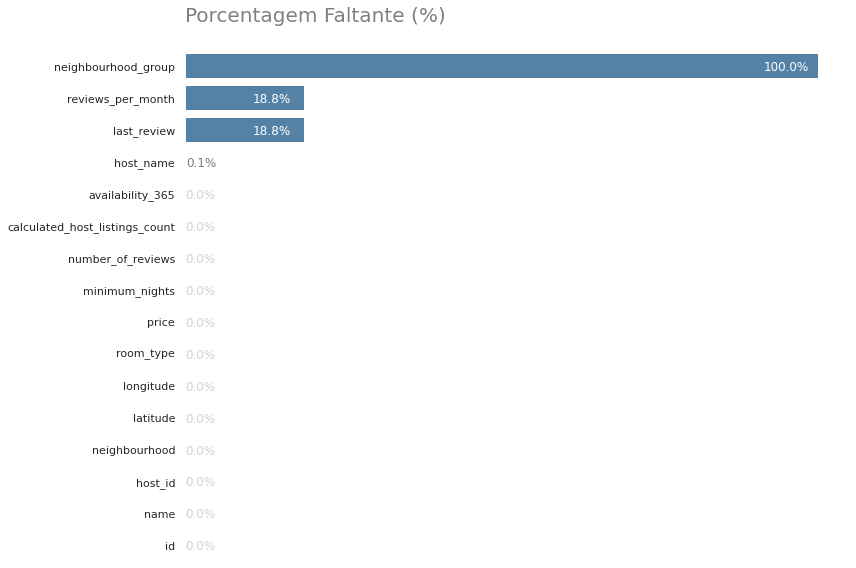

In [7]:
# Gráfico dos valores ausentes

figsize(12,8)
ax, fig = plt.subplots()


missing_percent = df.isnull().mean().sort_values(ascending=False).round(3)*100

# Plot
splot = sns.barplot(missing_percent.values, missing_percent.index, orient='h', color='SteelBlue');

for p in splot.patches:
    width=p.get_width()

    if width < 0.1:

        plt.text(p.get_width()+2.5, p.get_y()+0.55*p.get_height(),
                    '{}%'.format(width),
                    ha='center', va='center', color='lightgrey', size=12)
    
    elif width >= 0.1 and width < 0.9:
        plt.text(p.get_width()+2.5, p.get_y()+0.55*p.get_height(),
                    '{}%'.format(width),
                    ha='center', va='center', color='grey', size=12)
    
    else:
        plt.text(p.get_width()-5, p.get_y()+0.55*p.get_height(),
                    '{}%'.format(width),
                    ha='center', va='center', color='white', size=12, fontweight='light')

                
fig.set_title('Porcentagem Faltante (%)\n', size=20, color='grey', loc='left')
plt.xticks([], color='white')
sns.despine(left=True, bottom=True);
plt.tight_layout()


Com base nos valores obtidos, podemos afirmar que:
* A feature `neighbourhood_group` está totalmente faltante.
* As features `reviews_per_month` e `last_review` estão com aproximadamente 19% dos dados faltantes.
* A feature `host_name` possui aproximadamente 0,1% de dados faltantes.


O atributo `neighbourhood_group` refere-se ao grupo do qual o bairro pertence, podemos assumir que para **Tóquio**, os bairros não formem grupos, por isso o atributo se encontra totalmente sem valor. 

### **Q3. Qual o tipo de distribuição das variáveis?** 

Através do **histograma** é possível analisar as distribuições das variáveis do _dataset_ e nos permite identificar atributos que estejam "distorcidos" por seus valores discrepantes.

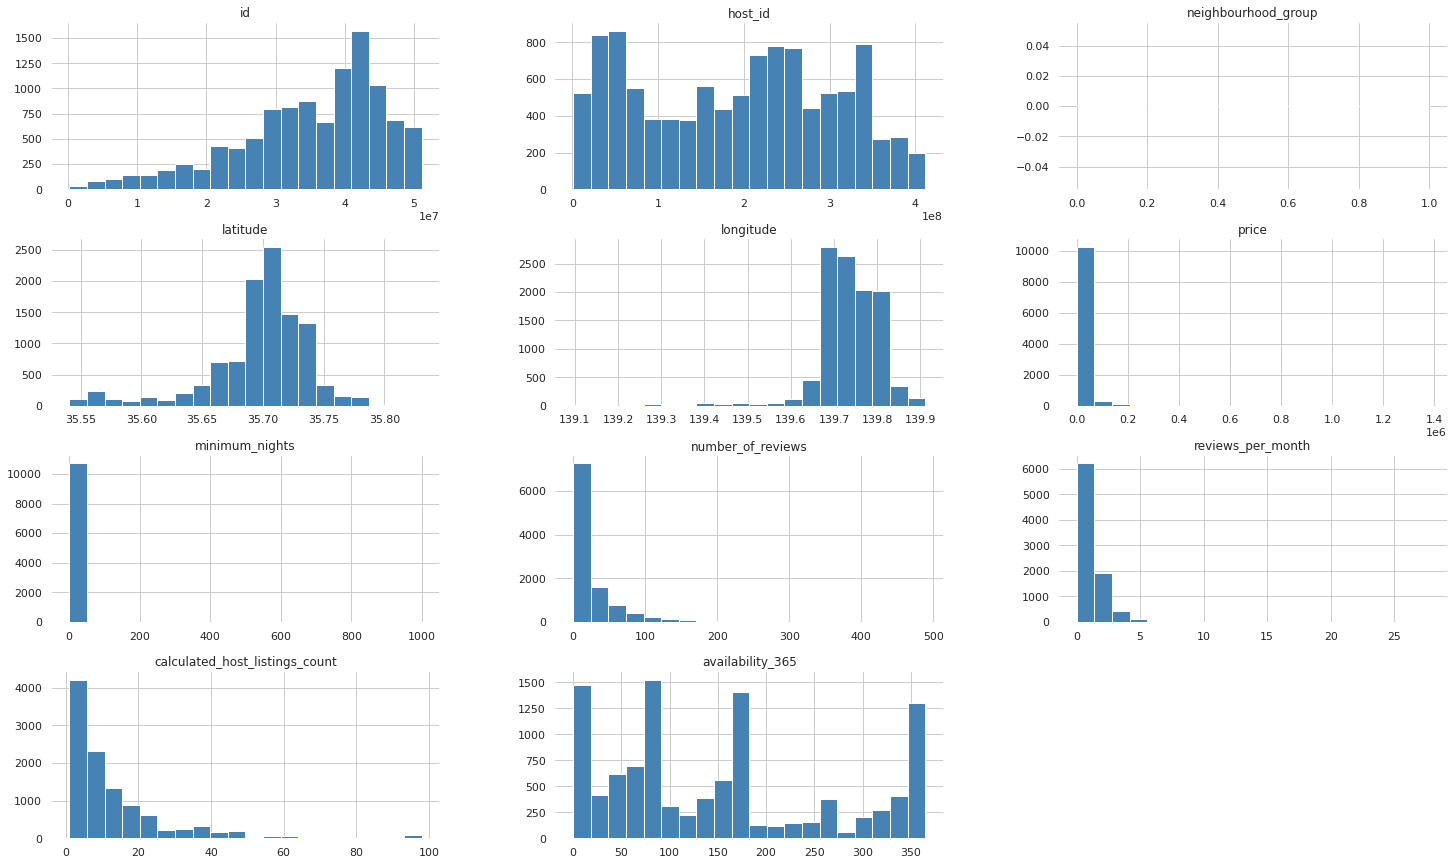

In [8]:
# Histograma dos atributos do dataset.

df.hist(figsize=(25,15), bins=20, color="Steelblue", grid=True);

sns.set_style('white')
sns.despine(left=True, bottom=True)

plt.show()

É possível ver que algumas _features_(atributos) não possuem uma distribuição bem definida, entretanto, para esta análise iremos focar apenas nos atributos `price` e `minimum_nights`.


### **Q4. Há *outliers* presentes?**

Olhando o histograma acima, é possível observar que as *features* `price`, `minimum_nights` e não seguem uma distribuição, o que pode indicar a presença de *outliers*.<br>
Para confirmar sua presença, há duas maneiras de identificá-los:
* O método `describe()` do `pandas`, mostra um resumo estatístico do DataFrame.
* Uso do gráfico do tipo `boxplot` para a variável.
* Calcular o IQR (_Intervalo Interquartil_) que servirá para definir os limites inferiores e superiores das variáveis e identificar os _outliers_.

In [9]:
# Resumo Estatístico do DataFrame

df.loc[:, ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.076000e+04,10760.000000,10760.000000,8738.000000,10760.000000,10760.000000
mean,2.151345e+04,3.531041,27.081877,1.162398,12.584758,153.398699
std,6.044958e+04,20.578030,43.501770,1.243153,14.443079,118.661460
min,0.000000e+00,1.000000,0.000000,0.020000,1.000000,0.000000
25%,5.257000e+03,1.000000,1.000000,0.380000,3.000000,61.000000
50%,9.229000e+03,1.000000,9.000000,0.880000,8.000000,134.000000
75%,1.800000e+04,2.000000,34.000000,1.560000,16.000000,245.250000
max,1.380000e+06,999.000000,489.000000,27.740000,98.000000,365.000000


As *features* `id` e `host_id` não foram selecionadas para o resumo por se tratarem de atributos de identificação, que não influenciariam em nada.

Na *feature* `price`, a moeda está em *Iene*, para efeito de comparação, converteremos em *Real* seguindo a fórmula com a cotação atual do Iene do dia **17/08/2021**.

* __1 Real = 20.86 Ienes japonês__ ou  __0,048 Iene = 1 Real brasileiro__



In [10]:
# Conversão da feature 'price' de Iene japonês para Real brasileiro


df['price'] = df['price'] / 20.86


In [11]:
df.loc[:, ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,10760.000000,10760.000000,10760.000000,8738.000000,10760.000000,10760.000000
mean,1031.325481,3.531041,27.081877,1.162398,12.584758,153.398699
std,2897.870347,20.578030,43.501770,1.243153,14.443079,118.661460
min,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,252.013423,1.000000,1.000000,0.380000,3.000000,61.000000
50%,442.425695,1.000000,9.000000,0.880000,8.000000,134.000000
75%,862.895494,2.000000,34.000000,1.560000,16.000000,245.250000
max,66155.321189,999.000000,489.000000,27.740000,98.000000,365.000000


Observando o resumo estatístico, vemos que:
* O atributo `price` possui 75% dos valores abaixo de R\$862.89 (*valor convertido*) enquanto o seu máximo é R$66.155,32.
* A média de `minimum_nights` é de 3.53 enquanto sua máxima é 999.
* 75% dos valores em `minimum_nights` estão abaixo de 2.
* O valor mínimo de `price` é 0.

Observando o **valor mínimo 0 de `price`**, podemos inferir que pode ser um erro de digitação ou outro tipo de problema, como por exemplo, o anfitrião só dirá o valor da locação mediante contato com o hóspede (famoso "valor inbox"), ou pode ser algum acordo paralelo com algum hóspede sobre uma locação específica.

#### Identificando e Removendo _outliers_

Existem diversas maneiras de tratar _outliers_ mas para esta análise, usaremos o IQR Score (_Amplitude Interquartil_), que define limites de valores superiores e inferiores para a variável em questão.

<p><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="50%"></p>

A fórmula para definir a amplitude interquartil:

    IQR = Q3 - Q1

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

Já para calcular os limites inferiores e superiores, usamos a seguinte fórmula:


- Limite inferior:  **Q1 - 1.5 * IQR**

- Limite superior:  **Q3 + 1.5 * IQR**

  
<br>

Primeiro, precisamos identificar o `Q1` e `Q3` para os atributos `price` e `minimum_nights` para então podermos identificar o que foi considerado como _outlier_.

O `pandas` possui o método `.quantile()` que retorna o quantil desejado de determinada variável, facilitando o nosso trabalho em descobrir essa informação.
<br><br>

**IQR (_Amplitude Interquartil_) de `price`**

In [12]:
# IQR de price

q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price

print('IQR de price:',IQR_price)


sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite Superior',sup_price)
print('Limite Inferior',inf_price)


IQR de price: 610.882070949185
Limite Superior 1779.2186001917544
Limite Inferior -664.3096836049856


Após os cálculos, determina-se que os limites para `price` foram:
* Superior: **R\$1779.21**
* Inferior: **R\$-664.30**

**Boxplot de `price`.**

Definidos o IQR, limite superior e inferior de `price`, com o `boxplot` visualizaremos melhor as discrepâncias (_outliers_) dos dados.

Preço acima de R$1779.21
1020 observações
9.48%

Preço <= 0
1 observações
0.01%


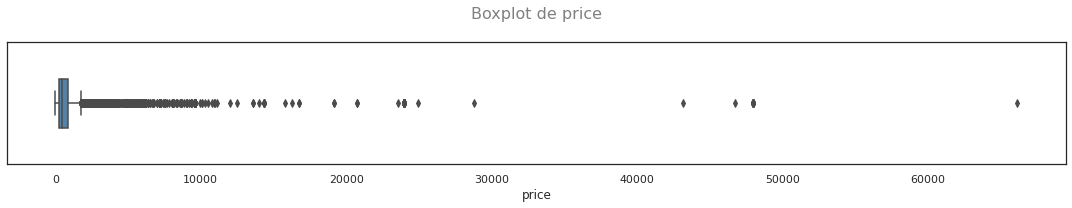

In [13]:
# Selecionando o atributo 'price' e gerando o boxplot
fig, ax = plt.subplots(figsize=(15,3))

sns.boxplot(x=df['price'], width=0.4, color='SteelBlue', ax=ax)

ax.set_title('Boxplot de price\n', size=16, color='grey')
sns.set_style('white')
plt.tight_layout()

# Quantidade de valores(%) em 'price' acima de R$1779.21
print("Preço acima de R$1779.21")
print("{} observações".format(len(df[df.price > 1779.21])))
print("{:.2f}%".format((len(df[df.price > 1779.21]) / df.shape[0])*100))

# Quantidade de valores(%) em 'price' menor ou igual a R$0.00
print("\nPreço <= 0")
print("{} observações".format(len(df[df.price <= 0])))
print("{:.2f}%".format((len(df[df.price <= 0]) / df.shape[0])*100))

O _boxplot_ aparece distorcido devido aos valores discrepantes encontrados em `price`.
Apenas 1 registro possui o valor menor ou igual a 0 em `price`.

**IQR de `minimum_nights`.**

In [14]:
# IQR de minimum_nights

q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights

print("IQR de minimum_nights:", IQR_minimum_nights)

sup_min_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_min_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print("Limite Superior:",sup_min_nights)
print("Limite Inferior:",inf_min_nights)

IQR de minimum_nights: 1.0
Limite Superior: 3.5
Limite Inferior: -0.5


Depois de calcular o IQR e aplicar os valores para `minimum_nights`, conclui-se que:
* Limite Superior de `minimum_nights` é **3.5** noites enquanto o Limite Inferior é **-0.5**.

Como não podemos ter valores abaixo de 1 em `minimum_nights`, pois o registro de locação deve ter o mínimo de uma noite de estadia, o valor do limite inferior para o atributo será **1**.

**Boxplot de `minimum_nights`.**

minimum_nights - acima de 3.5 dias:
829 observações
7.70%


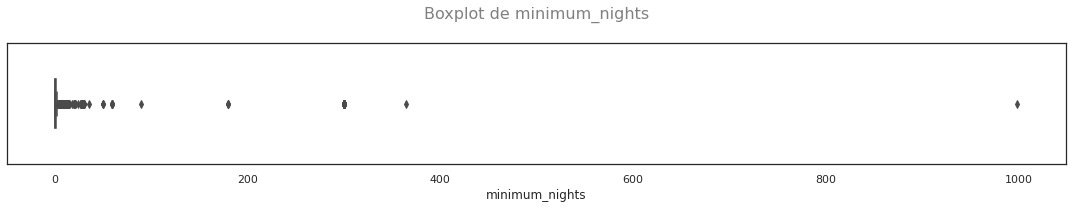

In [15]:
# Selecionando o atributo 'minimum_nights' e gerando um boxplot

fig, ax = plt.subplots(figsize=(15,3))
sns.boxplot(x=df['minimum_nights'], width=0.4, color='SteelBlue', ax=ax)
ax.set_title('Boxplot de minimum_nights\n', size=16, color='grey')
plt.tight_layout()

# Quantidade de valores(%) em 'minimum_nights' acima de 3.5 dias
print("minimum_nights - acima de 3.5 dias:")
print("{} observações".format(len(df[df.minimum_nights > 3.5])))
print("{:.2f}%".format((len(df[df.minimum_nights > 3.5]) / df.shape[0])*100))


Devido aos valores dos _outliers_, o _boxplot_ apresenta um gráfico ruidoso.

#### Histogramas sem *outliers*

Identificados os limites inferiores e superiores de `price` e `minimum_nights`, então é hora tratar os _outliers_ e checar novamente o histograma.




In [16]:
# Copiando o DataFrame e removendo os outliers.
df_clean = df.copy()

# Deletando os outliers
# Removendo os que estão com o preço maior do que o limite superior para price.
df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)

# Removendo os que estão com valores maiores do que o limite superior para minimum_nights.
df_clean.drop(df_clean[df_clean.minimum_nights > sup_min_nights].index, axis=0, inplace=True)

# Removendo os preços que estão com valor 0.
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)

# Removendo a feature que está sem dados.
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

Removidos os outliers, veremos como ficou o histograma do dataset após o tratamento.

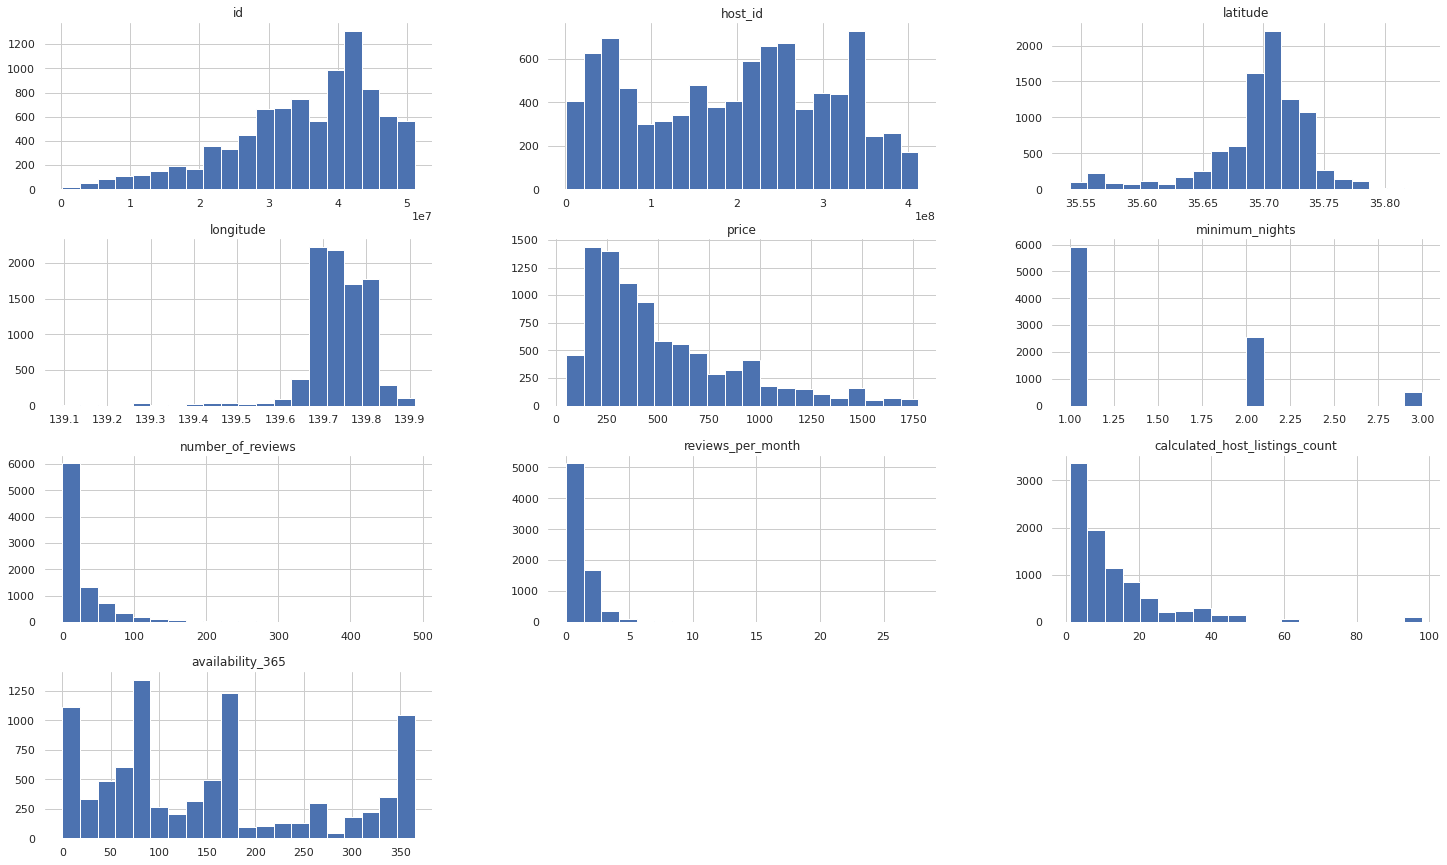

In [17]:
# Plotando o histograma novamente.

df_clean.hist(figsize=(25,15), bins=20, grid=True)

sns.despine(left=True, bottom=True)

plt.show()

Após o tratamento dos _outliers_, podemos notar uma distribuição mais definida para as variáveis tratadas.

Boxplot de `price` após a remoção dos outliers


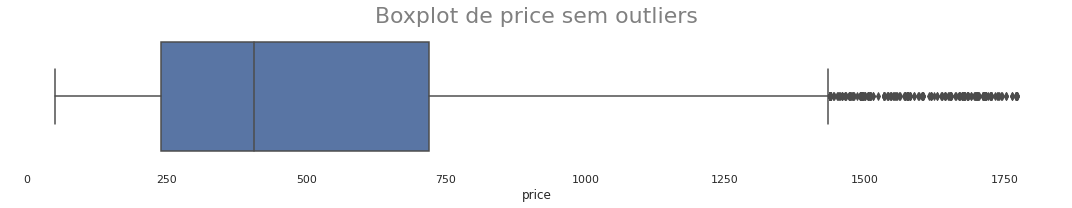

In [18]:
fig, ax = plt.subplots(figsize=(15,3))

sns.boxplot(x=df_clean['price'])
ax.set_title('Boxplot de price sem outliers', size=22, color='grey')

sns.despine(left=True, bottom=True)
plt.tight_layout()

Apesar do _boxplot_ mostrar que ainda temos "_outliers_", estes não irão interferir em nossa análise.

Boxplot de `minimum_nights` após a remoção dos outliers

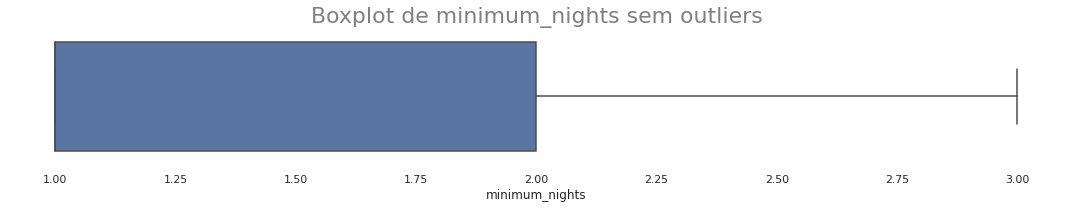

In [19]:
fig, ax = plt.subplots(figsize=(15,3))

sns.boxplot(x=df_clean['minimum_nights'])
ax.set_title('Boxplot de minimum_nights sem outliers', size=22, color='grey')

sns.despine(left=True, bottom=True)
plt.tight_layout()

### **Q4. Qual a correlação existente entre as variáveis**

A correlação expõe o quanto uma variável pode estar relacionada a outra, seja positivamente ou negativamente.

A função do coeficiente de correlação é estabelecer a __intensidade__ dessa relação.

Para identificar as correlações entre as variáveis, iremos:

* Gerar uma matriz de correlação
* Criar um *heatmap*(mapa de calor) usando a biblioteca `seaborn`

Primeiro, vamos gerar uma matriz de correlação que é uma espécie de "dataframe" contendo as correlações entre as variáveis.


In [20]:
# Gerando a matriz de correlação
features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']

matriz_corr = df_clean.loc[:, features].corr()

display(matriz_corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.042853,0.040551,0.073148,-0.049786,0.010472
minimum_nights,-0.042853,1.000000,0.072161,-0.060735,-0.067309,0.043278
number_of_reviews,0.040551,0.072161,1.000000,0.646080,-0.149237,0.019264
reviews_per_month,0.073148,-0.060735,0.646080,1.000000,-0.130414,0.003019
calculated_host_listings_count,-0.049786,-0.067309,-0.149237,-0.130414,1.000000,0.187695
availability_365,0.010472,0.043278,0.019264,0.003019,0.187695,1.000000


Após a criação desse dataframe de correlações, podemos usar as bibliotecas de visualização de dados para ver a intensidade das correlações, para isso usaremos o gráfico do tipo _heatmap_ (mapa de calor) da biblioteca *seaborn*.

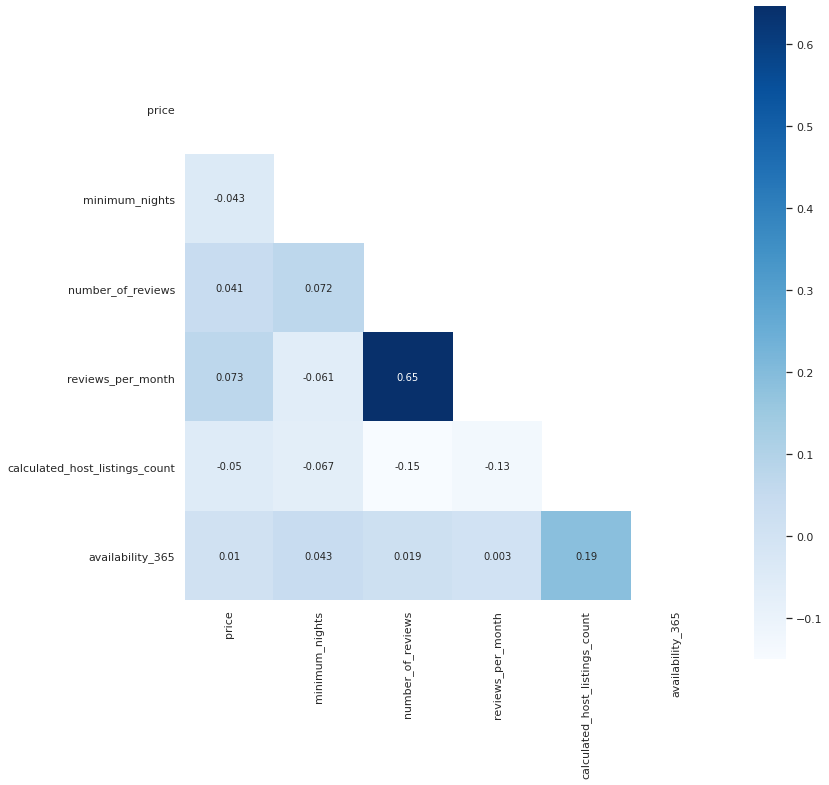

In [21]:
# Gerando um heatmap da matriz de correlação
figsize(12, 12)

mask = np.triu(np.ones_like(matriz_corr, dtype=bool))

sns.heatmap(matriz_corr, cmap="Blues", mask=mask, square=True, linecolor='white', annot=True);

Analisando o _heatmap_ podemos notar que as variáveis possuem correlações "fracas" entre si, onde somente _reviews_per_month_ e _number_of_reviews_ possuem uma correlação moderada.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Utilizando a função `value_counts()` do Pandas, é possível obter uma contagem dos valores de um atributo (_feature_).

Neste caso, usaremos o `value_counts()` na _feature_ `room_type` para descobrir qual o tipo de imóvel mais alugado do Airbnb de Tóquio.

In [22]:
# Quantidade de cada tipo de alocação anunciada
df_clean.loc[:, 'room_type'].value_counts()

Entire home/apt    6055
Private room       2257
Hotel room          348
Shared room         325
Name: room_type, dtype: int64

In [23]:
# Porcentagem de cada tipo de alocação anunciada
(df_clean.room_type.value_counts() / df_clean.shape[0]).round(4)*100

Entire home/apt    67.39
Private room       25.12
Hotel room          3.87
Shared room         3.62
Name: room_type, dtype: float64

Visualizando graficamente essa contagem.

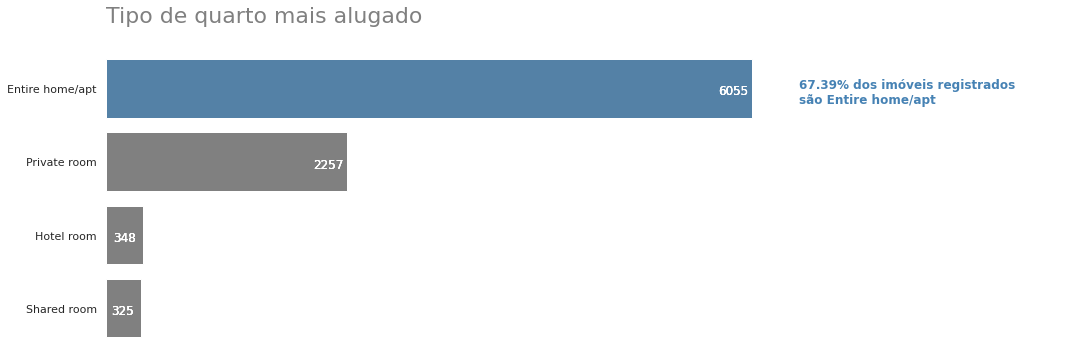

In [24]:
fig, ax = plt.subplots(figsize=(15,5))

indices = df_clean['room_type'].value_counts().index
valores = df_clean['room_type'].value_counts().values

bar_colors = ['grey' if (x < max(valores)) else 'steelblue' for x in valores]

splot = sns.barplot(x=valores, y=indices, palette=bar_colors, data=df_clean, ax=ax)

for p in splot.patches:

    # p.set_color('grey')
    for p in splot.patches:
        width=int(p.get_width())
        plt.text(p.get_width()-175, p.get_y()+0.55*p.get_height(),
                '{}'.format(width),
                ha='center', va='center', color='white', size=12, fontweight='light')

sns.despine(left=True, bottom=True)
ax.set_title('Tipo de quarto mais alugado\n', size=22, color='Grey', loc='left')
ax.text(6500, 0.2, '67.39% dos imóveis registrados\nsão Entire home/apt', size=12, color='Steelblue', fontweight='heavy')
ax.set_xlim([0,9000])


ax.xaxis.set_visible(False)
plt.tight_layout()

O tipo de imóvel mais alugado no Airbnb de Tóquio é `Entire home/apt` com 6055 registros que representa cerca de 67.39% dos imóveis alugados.

### **Q6. Qual a localidade mais cara de Tóquio?**



Usando o método `groupby()` podemos agrupar o dataset em função de um atributo. No caso, queremos comparar os bairros (_neighbourhoods_) a partir do preço médio de locação.

In [25]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Mitaka Shi        789.700041
Nishitokyo Shi    726.287293
Chofu Shi         649.608501
Minato Ku         645.629241
Chiyoda Ku        616.475382
Musashino Shi     595.985139
Shibuya Ku        577.514741
Taito Ku          573.129227
Suginami Ku       564.881808
Shinagawa Ku      554.564640
Name: price, dtype: float64

In [26]:
# Selecionando a lista com o nome dos bairros mais caros em média.

maiores_medias = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].index.to_list()

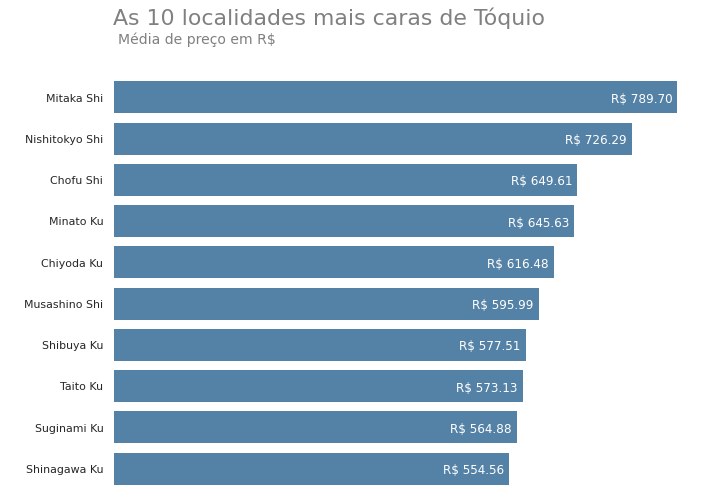

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))

data_plot = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


ax.set_title("As 10 localidades mais caras de Tóquio\n\n", size=22, color='grey', loc='left')
plt.suptitle("\nMédia de preço em R$", x=0.278, y=0.960, size=14, color='grey', fontweight='light',)

ax.set_ylabel([],color='white')
ax.xaxis.set_visible(False)

splot = sns.barplot(x=data_plot.values, 
                    y=data_plot.index, 
                    color='Steelblue',
                    ax=ax)

for p in splot.patches:
    width=p.get_width()
    plt.text(p.get_width()-50, p.get_y()+0.55*p.get_height(),
             'R$ {:1.2f}'.format(width),
             ha='center', va='center', color='white', size=12)


sns.despine(left=True, bottom=True)

plt.tight_layout()

`Mitaka Shi` aparece no topo da lista dos locais mais caros em média de Tóquio.

Podemos verificar se isso pode ser um caso de uma amostra não-representativa observando a quantidade de locações registradas para essa região.

Uma das formas de fazer uma busca em um _dataset_ é usando o método `.query()`
que funciona como uma _query_ em SQL, usaremos esse método para procurar as locações por bairros e fazer uma contagem da quantidade de locações registradas para o respectivo local.


In [28]:
# Quantidade de locações registradas em Mitaka Shi
print("Total de Registros: ",df_clean.query("neighbourhood == 'Mitaka Shi'").shape[0])

# Verificando os dados de Mitaka Shi
df_clean.query("neighbourhood == 'Mitaka Shi'")[['neighbourhood', 'price']].sort_values(by='price')

Total de Registros:  7


,neighbourhood,price
1315,Mitaka Shi,150.047939
1935,Mitaka Shi,150.047939
7338,Mitaka Shi,609.587728
83,Mitaka Shi,1054.650048
81,Mitaka Shi,1095.733461
2448,Mitaka Shi,1173.489933
647,Mitaka Shi,1294.343241


`Mitaka Shi` possui 7 locações registradas para essa área, com preços variando entre **R\$150.04** e **R$1173.48**, respectivamente. <br>
Com esses valores, a região assumiu a maior média entre as outras.

Em seguida, a segunda localidade com a média de preço maior é `Nishitokyo Shi` com média de **R$726.29**, veremos se a mesma possui poucos registros também.

In [29]:
# Quantidade de locações registradas em Nishitokyo Shi
print("Total de Registros: ",df_clean.query("neighbourhood == 'Nishitokyo Shi'").shape[0])

# Verificando os dados de Nishitokyo Shi
df_clean.query("neighbourhood == 'Nishitokyo Shi'")[['neighbourhood', 'price']].sort_values(by='price')


Total de Registros:  17


,neighbourhood,price
9917,Nishitokyo Shi,186.960690
565,Nishitokyo Shi,203.739214
785,Nishitokyo Shi,203.739214
693,Nishitokyo Shi,203.739214
2397,Nishitokyo Shi,239.693193
2260,Nishitokyo Shi,263.662512
2368,Nishitokyo Shi,287.631831
8505,Nishitokyo Shi,469.798658
3645,Nishitokyo Shi,477.996165
3475,Nishitokyo Shi,585.762224


Em `Nishitokyo Shi`, a quantidade de registros de locações sobe para **17** e apresentam uma média de preço um pouco menor que `Mitaka Shi`.

Em terceiro lugar, aparece `Chofu Shi` com média de **R$649.61**.

In [30]:
# Quantidade de locações registradas em Chofu Shi
print("Total de Registros: ",df_clean[df_clean.neighbourhood == "Chofu Shi"].shape[0])

# Verificando os dados de Chofu Shi
df_clean[df_clean.neighbourhood == "Chofu Shi"][['neighbourhood', 'price']].sort_values(by='price')

Total de Registros:  12


,neighbourhood,price
314,Chofu Shi,143.815916
6076,Chofu Shi,143.815916
3902,Chofu Shi,189.022052
5663,Chofu Shi,191.754554
1463,Chofu Shi,317.066155
9691,Chofu Shi,406.615532
2399,Chofu Shi,410.882071
2599,Chofu Shi,623.202301
1265,Chofu Shi,719.079578
8239,Chofu Shi,1438.159156


Já `Chofu Shi` apresenta um total de 12 registros para a região.

Veremos os dados da região `Shibuya Ku`, que por sinal, se refere a um dos principais centros comerciais e financeiros do Japão e do mundo.

In [31]:
# Quantidade de locações registradas em Shibuya Ku
print("Total de Registros: ",df_clean.query("neighbourhood == 'Shibuya Ku'").shape[0])
print("Preço Mínimo: R$",round(df_clean.query("neighbourhood == 'Shibuya Ku'")['price'].min(),2))
print("Preço Máximo: R$",round(df_clean.query("neighbourhood == 'Shibuya Ku'")['price'].max(),2))

# Verificando os dados de Shibuya Ku
df_clean.query("neighbourhood == 'Shibuya Ku'")[['neighbourhood', 'price']].sort_values(by='price')

Total de Registros:  447
Preço Mínimo: R$ 99.19
Preço Máximo: R$ 1773.73


,neighbourhood,price
5599,Shibuya Ku,99.185043
5601,Shibuya Ku,99.185043
9206,Shibuya Ku,99.280920
9298,Shibuya Ku,99.280920
9291,Shibuya Ku,99.280920
...,...,...
1360,Shibuya Ku,1712.080537
7410,Shibuya Ku,1712.080537
8205,Shibuya Ku,1725.790988
8657,Shibuya Ku,1737.823586


`Shibuya Ku` possui 447 registros de locações para a região, com valores que variam entre **R\$99.19** e **R\$1773.73**.

Com a suspeita de valores discrepantes, podemos fazer uma comparação da **média** com a **mediana** das localizações com as maiores médias que nos fornecerá uma __medida de assimetria__ da distribuição, dessa forma, a média não deve ser muito distante de mediana.

Plotaremos então um novo gráfico com a __mediana__ do preço de cada bairro comparando com a __média__.

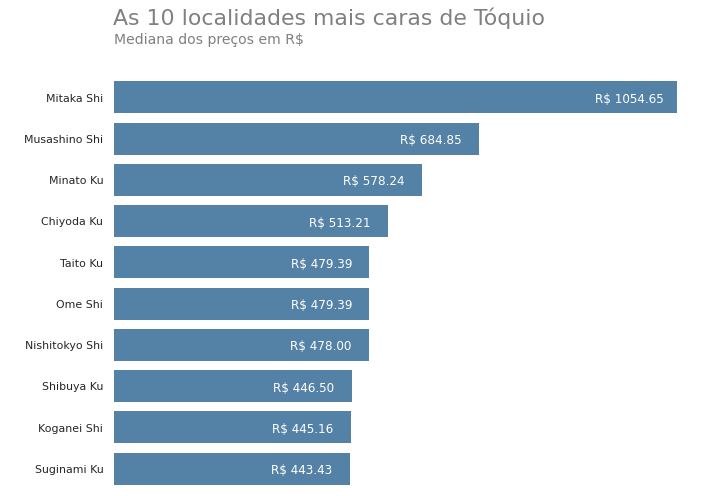

In [32]:
fig, ax = plt.subplots(figsize=(10, 7))

data_plot = df_clean.groupby(['neighbourhood']).price.median().sort_values(ascending=False)[:10]


ax.set_title("As 10 localidades mais caras de Tóquio\n\n", size=22, color='grey', loc='left')
plt.suptitle("\nMediana dos preços em R$", x=0.295, y=0.960, size=14, color='grey', fontweight='light',)

ax.set_ylabel([],color='white')
ax.xaxis.set_visible(False)

splot = sns.barplot(x=data_plot.values, 
                    y=data_plot.index, 
                    color='Steelblue',
                    ax=ax)

for p in splot.patches:
    width=p.get_width()
    plt.text(p.get_width()-90, p.get_y()+0.55*p.get_height(),
             'R$ {:1.2f}'.format(width),
             ha='center', va='center', color='white', size=12)


sns.despine(left=True, bottom=True)

plt.tight_layout()

Podemos notar que as medianas de preços variam em relação ao ranking de média, ao observar a **mediana** de preço de `Mitaka Shi` **(R\$1054.65)** é mais cara do que sua **média (R\$789.70)** onde podemos suspeitar de valores discrepantes que fazem a média de preço para a região ser menor em relação a sua mediana.

É interessante ressaltar que novas regiões apareceram e outras sumiram. Veremos então essas diferenças.

In [33]:
# Gerando lista com o nome dos bairros com as 10 maiores médias e medianas
media_lista = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).index[:10]
mediana_lista = df_clean.groupby(['neighbourhood']).price.median().sort_values(ascending=False).index[:10]

# Gerando uma lista com a diferença dos nomes dos bairros
diferenca_lista = set(mediana_lista) - set(media_lista)
print(diferenca_lista)

{'Koganei Shi', 'Ome Shi'}


As novas localidades que apareceram usando a mediana foram:
* `Ome Shi`
* `Koganei Shi`

Veremos no gráfico abaixo em que posições essas novas localizações ocupam:

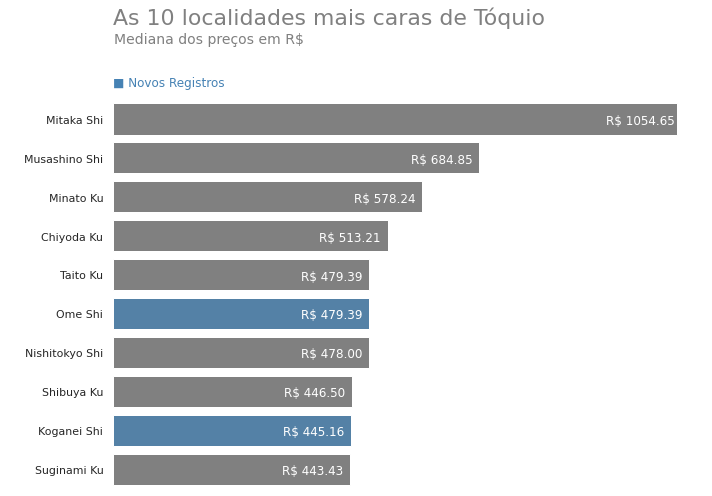

In [34]:
fig, ax = plt.subplots(figsize=(10, 7))

data_plot = df_clean.groupby(['neighbourhood']).price.median().sort_values(ascending=False)[:10]
bar_colors = ['Steelblue' if (x in diferenca_lista) else 'grey' for x in mediana_lista]

ax.set_title("As 10 localidades mais caras de Tóquio\n\n\n", size=22, color='grey', loc='left')
plt.suptitle("\nMediana dos preços em R$", x=0.295, y=0.960, size=14, color='grey', fontweight='light',)
ax.text(x=0, y=-0.850, s="\n■ Novos Registros", size=12, color='Steelblue', fontweight='light')

ax.set_ylabel([],color='white')
ax.xaxis.set_visible(False)

splot = sns.barplot(x=data_plot.values, 
                    y=data_plot.index, 
                    palette=bar_colors,
                    ax=ax)

for p in splot.patches:
    width=p.get_width()
    plt.text(p.get_width()-70, p.get_y()+0.55*p.get_height(),
             'R$ {:1.2f}'.format(width),
             ha='center', va='center', color='white', size=12)


sns.despine(left=True, bottom=True)

plt.tight_layout()

Além de novos registros aparecerem nesse ranking, algumas localidades trocaram de posições como o caso de `Musashino Shi` que subiu para a segunda localização com mediana mais cara, mas para podermos comparar a média com a mediana desses bairros mais "caros" de Tóquio, descataremos essas novas localizações e usaremos os dados apenas os bairros que apareceram com as maiores médias de preços.

O gráfico abaixo exibe a mediana de preços ordenados pelos bairros com as maiores médias.

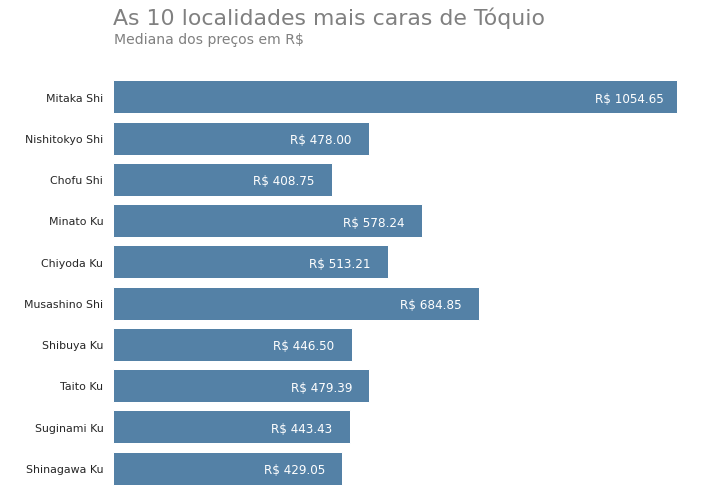

In [35]:
fig, ax = plt.subplots(figsize=(10, 7))

data_plot = df_clean.groupby(['neighbourhood']).price.median().sort_values(ascending=False)
data_plot = data_plot[maiores_medias]


ax.set_title("As 10 localidades mais caras de Tóquio\n\n", size=22, color='grey', loc='left')
plt.suptitle("\nMediana dos preços em R$", x=0.295, y=0.960, size=14, color='grey', fontweight='light',)

ax.set_ylabel([],color='white')
ax.xaxis.set_visible(False)

splot = sns.barplot(x=data_plot.values, 
                    y=data_plot.index, 
                    color='Steelblue',
                    ax=ax)

for p in splot.patches:
    width=p.get_width()
    plt.text(p.get_width()-90, p.get_y()+0.55*p.get_height(),
             'R$ {:1.2f}'.format(width),
             ha='center', va='center', color='white', size=12)


sns.despine(left=True, bottom=True)

plt.tight_layout()



Comparando a média de preços com a mediana de preços, sem levar em conta a localização, usando apenas os valores dos preços, obtivemos os seguinte resultado:


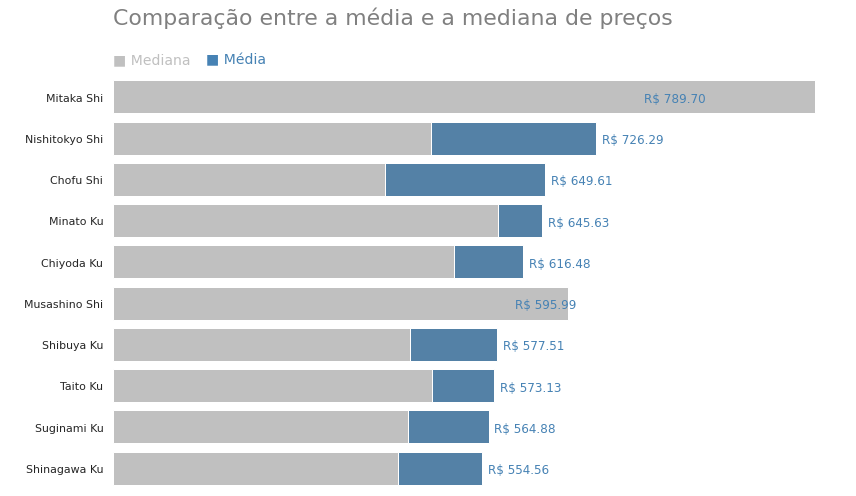

In [36]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 7))

mediana_preco = df_clean.groupby(['neighbourhood']).price.median().sort_values(ascending=False)
mediana_preco = mediana_preco[maiores_medias]
media_preco = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

ax.set_ylabel([],color='white')
ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)

ax.set_title("Comparação entre a média e a mediana de preços\n\n", size=22, color='grey', loc='left')
plt.suptitle("\n■ Mediana", x=0.18, y=0.920, size=14, color='Silver')
plt.text(x=140, y=-0.80, s="\n■ Média", size=14, color='Steelblue')
#plt.suptitle("\n■ Média", x=0.350, y=0.960, size=14, color='Steelblue', fontweight='light',)

# Media
splot = sns.barplot(x=media_preco.values, 
                    y=data_plot.index, 
                    color='Steelblue',
                    ax=ax)

for p in splot.patches:
    width=p.get_width()
    plt.text(p.get_width()+55, p.get_y()+0.55*p.get_height(),
             'R$ {:1.2f}'.format(width),
             ha='center', va='center', color='Steelblue', size=12)
    

sns.barplot(x=mediana_preco.values, 
                    y=data_plot.index, 
                    color='Silver',
                    ax=ax)



    
sns.despine(left=True, bottom=True)

plt.tight_layout()



Pode-se observar que alguns valores mais altos distorcem a média de preços, deixando-as um pouco maiores do que a mediana com exceção dos bairros `Mitaka Shi` e `Musashino Shi` onde as medianas dos preços para essas localidades são maiores do que suas médias pois possuem valores que distorcem a média para menos.

Por fim, no gráfico abaixo é mostrado a quantidade total de registros feitos para os bairros vistos como os mais caros.


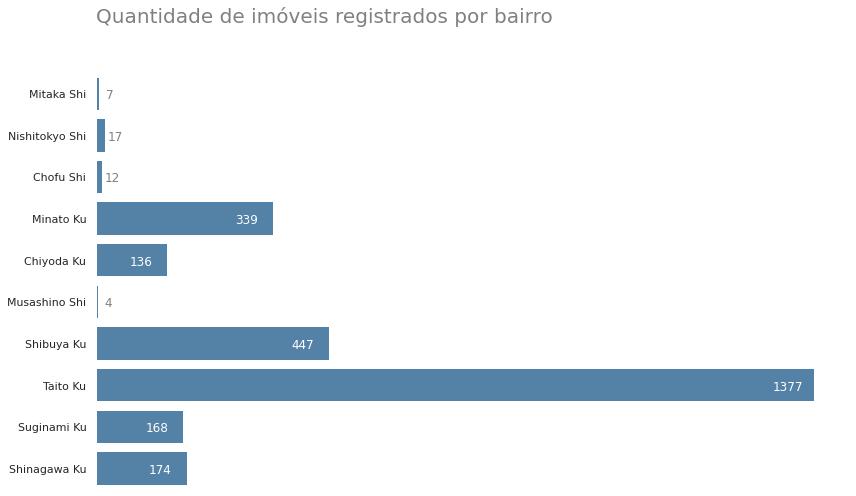

In [37]:
# Gráfico de quantidade de locações registradas nos bairros

fig, ax = plt.subplots(figsize=(12,7))

neighbourhood_count = df_clean['neighbourhood'].value_counts(ascending=False)
neighbourhood_count = neighbourhood_count[maiores_medias]

splot = sns.barplot(x=neighbourhood_count.values, y=neighbourhood_count.index, color='steelblue', ax=ax)

for p in splot.patches:
    width=int(p.get_width())
    if width <= 70:
        plt.text(p.get_width()+20, p.get_y()+0.55*p.get_height(),
                '{}'.format(width),
                ha='center', va='center', color='grey', size=12)
        
    elif width > 70:
        plt.text(p.get_width()-50, p.get_y()+0.55*p.get_height(),
                '{}'.format(width),
                ha='center', va='center', color='white', size=12)
        



ax.set_title('Quantidade de imóveis registrados por bairro\n\n', loc='left', size=20, color='grey')
sns.despine(left=True, bottom=True)
ax.xaxis.set_visible(False)

plt.tight_layout()

Nota-se que a mediana e a média de preços são influenciadas pela quantidade de locações registradas para determinado bairro, bem como os preços registrados para a região. Os bairros considerados "mais caros" possuem menos de 20 registros para suas regiões com exceção de `Musashino Shi` que possui apenas 4 registros mas que possui valores discrepantes que diminuíram sua média fazendo com o que sua mediana seja superior.

### Mapa


Como temos a informação sobre a Latitude e Longitude dos imóveis, podemos plotar cada ponto levando em consideração `x=longitude` e `y=latitude` e assim teremos um mapa de Tóquio onde podemos identificar a localização das casas e seus `price` e possível "_outliers_" de localizações.

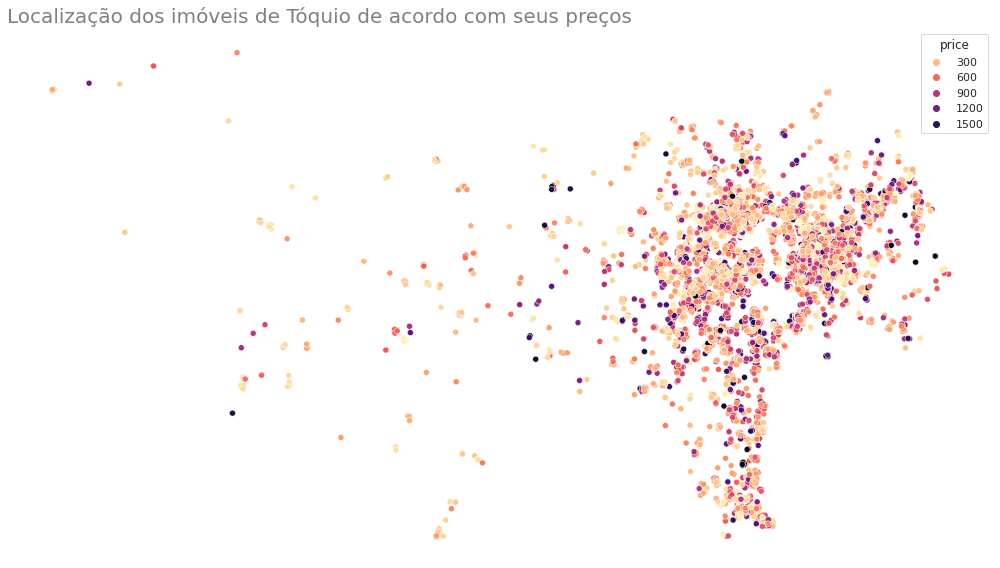

In [38]:
# Plotando um gráfico dos imóveis pela latitude-longitude e diferenciando por preço
fig, ax = plt.subplots(figsize=(14,8))

sns.scatterplot(x="longitude", y="latitude", data=df_clean, hue="price", palette="magma_r")
ax.set_title("Localização dos imóveis de Tóquio de acordo com seus preços", size=20, loc='left', color='grey')
sns.despine(left=True, bottom=True)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)


plt.tight_layout()

Apesar da maiorias dos pontos estarem aglomerados no centro de Tóquio, alguns pontos começam a se distanciar bastante dessa concentração.
Para averiguar melhor onde esses pontos se localizam, podemos usar a biblioteca [__`folium`__](https://python-visualization.github.io/folium/), que nos permite plotar um mapa interativo para a melhor visualização de mapas.

O dataset que usamos nos fornece as coordenadas de cada locação registrada, dessa forma as usaremos para criar os pontos no mapa.

Primeiro, precisamos instalar a biblioteca `folium` com o seguinte comando.

In [39]:
# Instalando o folium para plot do mapa
!pip install folium -q

In [40]:
# Importando o folium
import folium
%matplotlib notebook

print(folium.__version__)

0.8.3


Fazendo uma pesquisa rápida, descobrimos que a latitude e longitude de Tóquio são `35.652832` e `139.839478`.

Precisamos passar essas coordenadas para plotar o mapa de Tóquio no Folium.

In [41]:
# Gerando o mapa de Tóquio

toquio = folium.Map(width="70%", height="70%",
                    location=[35.652832, 139.839478], 
                    tiles="Stamen Terrain", 
                    zoom_start=9.6,
                    min_zoom=9,
                    max_zoom=13
                    )

# Exibindo o mapa
toquio

<img alt="Mapa de Tóquio" width="100%" src="https://raw.githubusercontent.com/roberto-paixao/Analise_Airbnb_Toquio/main/imgs/mapa_toquio.png">

Com o mapa funcionando, agora devemos criar uma lista com os valores de `latitude` e `longitude` de cada registro do dataset para plotar cada ponto no mapa.

In [42]:
# Gerando uma lista com a latitude e longitude dos imóveis do Airbnb de Tóquio

coords = []

for lat, lng in zip(df_clean.latitude.values, df_clean.longitude.values):
    coords.append([lat, lng])

Adicionando as coordenadas dos imóveis no mapa, gerando um _heatmap_ mostrando a concentração de imóveis.

In [43]:
# Importando o módulo Heatmap
from folium.plugins import HeatMap

# Adicionando as coordenadas ao mapa
toquio.add_child(HeatMap(coords, blur=25, radius=20))

# Exibindo o mapa
toquio

<img alt="Mapa de Tóquio" width="100%" src="https://raw.githubusercontent.com/roberto-paixao/analise-airbnb-toquio/main/imgs/mapa_toquio_heatmap.png">

O _heatmap_ mostra que alguns pontos realmente estão fora da concentração de registros (_outliers_), entretanto ainda não podemos considerar esses pontos como _outliers_ para excluir ou tratar pois se tratam de registros localizados em fazendas ou regiões rurais de Tóquio, o que poderia ser um erro de digitação na hora do registro ou simplesmente ser uma locação em área rural para as pessoas que desejem visitar a área rural/florestas de Tóquio ou até mesmo desejem ficar um pouco mais distante do ambiente urbano.

## Conclusões

<img alt="Tokyo-shibuya" width="750" height="400" src="https://raw.githubusercontent.com/roberto-paixao/Analise_Airbnb_Toquio/main/imgs/shibuya-crossing-toquio.jpg">

Mesmo usando a versão resumida de um _dataset_ maior, pode-se extrair _insights_ interessantes a respeito dos dados tais como:

* Presença de _outliers_ em alguns atributos;
* A quantidade de imóveis disponíveis em uma região interferem nas informações estatísticas de outras _features_;

* Presença de valores discrepantes nos atributos `price` e `minimum_nights`, onde esses valores não correspondiam com a realidade;

* Tratamento e limpeza desses dados usando o `IQR Score` para definir quais valores são discrepantes antes de podermos fazer a análise dos dados;

* Alguns atributos do dataset estavam totalmente sem registros alguns ou com registros faltantes, porém, estes não foram tão importantes para o foco desta análise e logo não foram utilizados;

* Observamos que o tipo de quarto mais alugado é `Entire home/apt` que em tradução `Casa inteira/apartamento`.


Já para as localidades mais caras do Airbnb de Tóquio, pudemos evidenciar algumas distorcões nos preços devido a quantidade de registros para aquela região, pois, dependendo da quantidade de registros, os valores de média e mediana podem variar bastante.

Devemos ressaltar a importância de tratar e analisar bem os dados e não tomar decisões apenas nos dados estatísticos mostrados, como por exemplo se basear na média pois a mesma é sensível a _outliers_ que podem não condizer com a realidade.

Recomenda-se que, futuramente, seja feita uma análise exploratória mais detalhada usando o conjunto de dados completo, contendo 106 _features_ (atributos).

---

Se você encontrou algum erro ou equívoco, ou quiser entrar em contato para debater algum ponto:

* [LinkedIN](https://www.linkedin.com/in/roberto-paixao95/)
* E-mail: robertocsp95@gmail.com